In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/maged918/guc-workshop/master/guc_internal.csv')

### Basic Internal Analysis

In [5]:
print('Number of rows',len(df))
print('---\nData Head')
# print(df.head(10))
print(df.head(10))
print(df.columns)

Number of rows 3000
---
Data Head
   Unnamed: 0    confirmed  ... operators_departments  year
0           0  unconfirmed  ...                german  2018
1           1    confirmed  ...                german  2018
2           2  unconfirmed  ...               spanish  2018
3           3  unconfirmed  ...               spanish  2018
4           4  unconfirmed  ...               spanish  2018
5           5  unconfirmed  ...                german  2018
6           6  unconfirmed  ...                german  2018
7           7  unconfirmed  ...                italan  2018
8           8  unconfirmed  ...               spanish  2018
9           9    confirmed  ...                french  2018

[10 rows x 7 columns]
Index(['Unnamed: 0', 'confirmed', 'department', 'nation', 'operator',
       'operators_departments', 'year'],
      dtype='object')


In [6]:
print('Describe Data\n')
for col in df.columns:
    print('COLUMN', col)
    print(df[col].value_counts())
    print('\n')

Describe Data

COLUMN Unnamed: 0
2047    1
1040    1
1058    1
1056    1
1054    1
       ..
497     1
2544    1
495     1
2542    1
0       1
Name: Unnamed: 0, Length: 3000, dtype: int64


COLUMN confirmed
unconfirmed    2320
confirmed       680
Name: confirmed, dtype: int64


COLUMN department
Client      1926
Business    1074
Name: department, dtype: int64


COLUMN nation
germany    900
spain      900
france     600
italy      600
Name: nation, dtype: int64


COLUMN operator
Zachary Henry       265
Stephen Silva       260
Mr. Timothy Hall    245
James Rivera        232
Dennis David        221
Tiffany Jones       217
Tammie Friedman     215
Jerry Rivera        213
Tristan Diaz        208
Kristen Berry       200
Denise Andrews      188
Karen Harrington    186
Wesley Blanchard    176
Kenneth Lee         174
Name: operator, dtype: int64


COLUMN operators_departments
german     1075
spanish    1070
french      436
italan      419
Name: operators_departments, dtype: int64


COLUMN year
2

In [37]:
#Computing the confirmation rate for each column 

def get_c_rate(df,col):
  new_df = df[(df.confirmed == 'confirmed')]
  print(new_df.groupby(col).describe() )
  the_count = new_df[col].count()
  the_total =df[col].count()
  print(the_total)
  print(new_df[col].count() )
  return (the_count / the_total) *100

colo='nation'
get_c_rate(df,colo)
# new_df = df[(df.confirmed == 'confirmed')]
# print(new_df.head())


        Unnamed: 0                           ...    year                
             count         mean         std  ...     50%     75%     max
nation                                       ...                        
france        81.0  1200.209877  782.494037  ...  2018.0  2019.0  2019.0
germany      223.0  1387.125561  883.245664  ...  2018.0  2019.0  2019.0
italy        152.0  1166.809211  834.537535  ...  2018.0  2019.0  2019.0
spain        224.0  1280.566964  860.143812  ...  2018.0  2019.0  2019.0

[4 rows x 16 columns]
3000
680


22.666666666666664

### Across years

Unnamed: 0
year  Unnamed: 0
2018  0             1
      1             1
      2             1
      3             1
      4             1
                   ..
2019  2995          1
      2996          1
      2997          1
      2998          1
      2999          1
Name: Unnamed: 0, Length: 3000, dtype: int64


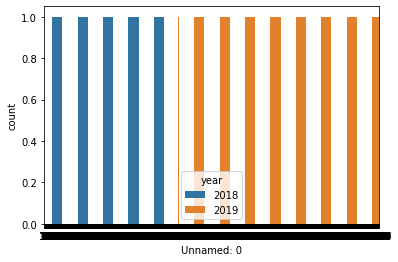

--
department
year  department
2018  Client         846
      Business       354
2019  Client        1080
      Business       720
Name: department, dtype: int64


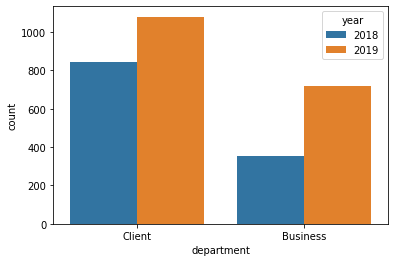

--
nation
year  nation 
2018  spain      363
      germany    338
      italy      253
      france     246
2019  germany    562
      spain      537
      france     354
      italy      347
Name: nation, dtype: int64


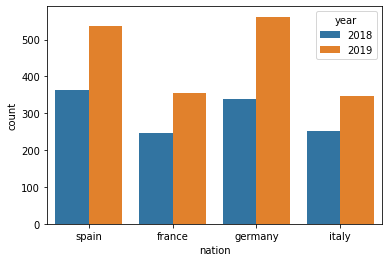

--
operator
year  operator        
2018  Dennis David        100
      Tristan Diaz         96
      James Rivera         92
      Tiffany Jones        91
      Mr. Timothy Hall     89
      Zachary Henry        89
      Karen Harrington     88
      Wesley Blanchard     88
      Jerry Rivera         83
      Tammie Friedman      83
      Kristen Berry        82
      Stephen Silva        81
      Denise Andrews       76
      Kenneth Lee          62
2019  Stephen Silva       179
      Zachary Henry       176
      Mr. Timothy Hall    156
      James Rivera        140
      Tammie Friedman     132
      Jerry Rivera        130
      Tiffany Jones       126
      Dennis David        121
      Kristen Berry       118
      Denise Andrews      112
      Kenneth Lee         112
      Tristan Diaz        112
      Karen Harrington     98
      Wesley Blanchard     88
Name: operator, dtype: int64


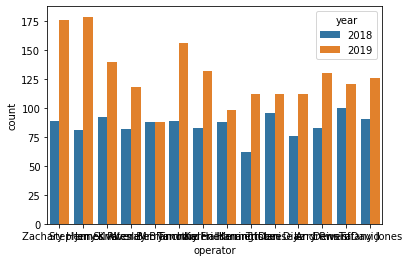

--
operators_departments
year  operators_departments
2018  spanish                  444
      german                   422
      french                   183
      italan                   151
2019  german                   653
      spanish                  626
      italan                   268
      french                   253
Name: operators_departments, dtype: int64


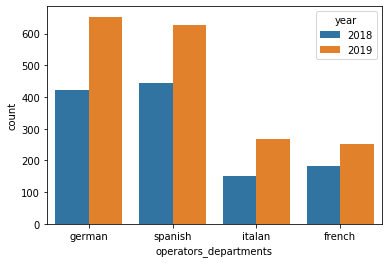

--
confirmed
year  confirmed  
2018  unconfirmed     829
      confirmed       371
2019  unconfirmed    1491
      confirmed       309
Name: confirmed, dtype: int64


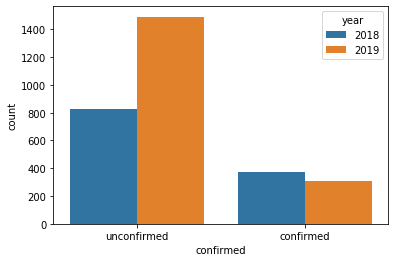

--


In [0]:
import matplotlib.pyplot as plt
for col in set(df.columns).difference(set(['year'])):
    print(col)
    print(df.groupby(['year'])[col].value_counts())
    sns.countplot(data=df, x=col, hue='year')
    plt.show()
    print('--')

### Confirmation Rate

In [0]:
def get_confirmation_rate(df, col, val):
    """ Gets confirmation rate from a DataFrame for a single value present in one of the columns
    
    Example use-case: getting a single value for the confirmation rate of Italian nationality
    
    Args:
        df: Pandas DataFrams
        col: Which column to filter on
        val: Value present in ``col''
    
    Returns:
        String (number followed by % sign) 
            indicating the percentage of confirmation of the filtered DataFrame
    """
    return '%.2f %%' % (df[df[col]==val].confirmed.value_counts(normalize=True)['confirmed'] * 100)

def get_confirmation_rate_all(df, col):
    """ Gets confirmation rate for all the values in the col variable
    
    Groups by the ``col'' variable and returns the confirmation rate per group
    
    Example use-case: getting the confirmation rate for all nationalities (in the ``nation'' column)
    
    Args:
        df: Pandas DataFrame
        col: variable(s) to group by; can group by single column or multiple ones
    
    Returns:
        Series containing the confirmation rate per group
    """
    return df.groupby(col).apply(lambda  x: x['confirmed'].value_counts(normalize=True)['confirmed'] * 100)

In [27]:
single_val = get_confirmation_rate(df, 'operators_departments','french')
print(single_val)

22.94 %


In [38]:
single_grouping = get_confirmation_rate_all(df, 'nation')
print(single_grouping)

nation
france     13.500000
germany    24.777778
italy      25.333333
spain      24.888889
dtype: float64


In [52]:
#getting confirmation rate by operators request
#gets the number of requests each operator recieved

new_df = df[(df.confirmed == 'confirmed')]
print("new_data")
print(new_df['operator'].value_counts(normalize=True)  *100)
print("old data")
print(df['operator'].value_counts(normalize=True) *100)

# og= get_confirmation_rate_all(df,'operator')
# print(og)


new_data
Mr. Timothy Hall    10.294118
Stephen Silva        9.117647
Tiffany Jones        8.823529
Tammie Friedman      8.676471
Kristen Berry        7.352941
James Rivera         7.352941
Kenneth Lee          7.205882
Tristan Diaz         7.205882
Wesley Blanchard     6.470588
Jerry Rivera         6.323529
Dennis David         6.029412
Karen Harrington     6.029412
Denise Andrews       5.588235
Zachary Henry        3.529412
Name: operator, dtype: float64
old data
Zachary Henry       8.833333
Stephen Silva       8.666667
Mr. Timothy Hall    8.166667
James Rivera        7.733333
Dennis David        7.366667
Tiffany Jones       7.233333
Tammie Friedman     7.166667
Jerry Rivera        7.100000
Tristan Diaz        6.933333
Kristen Berry       6.666667
Denise Andrews      6.266667
Karen Harrington    6.200000
Wesley Blanchard    5.866667
Kenneth Lee         5.800000
Name: operator, dtype: float64


In [29]:
multi_grouping = get_confirmation_rate_all(df, (['operators_departments', 'year']))
print(multi_grouping)

operators_departments  year
french                 2018    29.508197
                       2019    18.181818
german                 2018    28.672986
                       2019    13.476263
italan                 2018    35.761589
                       2019    24.253731
spanish                2018    31.981982
                       2019    17.571885
dtype: float64


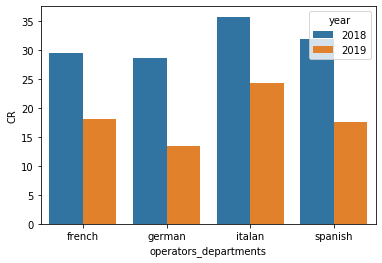

In [30]:
plot = multi_grouping.reset_index().rename(columns={0:'CR'})
sns.barplot(data=plot, x = 'operators_departments', y='CR', hue='year')

### Operators Hypothesis

In [47]:
df.groupby(['operators_departments']).operator.value_counts(normalize=True)

operators_departments  operator        
french                 Dennis David        0.506881
                       Tammie Friedman     0.493119
german                 Zachary Henry       0.246512
                       Stephen Silva       0.241860
                       Denise Andrews      0.174884
                       Karen Harrington    0.173023
                       Wesley Blanchard    0.163721
italan                 Mr. Timothy Hall    0.584726
                       Kenneth Lee         0.415274
spanish                James Rivera        0.216822
                       Tiffany Jones       0.202804
                       Jerry Rivera        0.199065
                       Tristan Diaz        0.194393
                       Kristen Berry       0.186916
Name: operator, dtype: float64

In [0]:
df_2019 = df[df.year==2019]
df_2019.groupby('operators_departments').operator.value_counts(normalize=True)

operators_departments  operator        
french                 Tammie Friedman     0.521739
                       Dennis David        0.478261
german                 Stephen Silva       0.274119
                       Zachary Henry       0.269525
                       Denise Andrews      0.171516
                       Karen Harrington    0.150077
                       Wesley Blanchard    0.134763
italan                 Mr. Timothy Hall    0.582090
                       Kenneth Lee         0.417910
spanish                James Rivera        0.223642
                       Jerry Rivera        0.207668
                       Tiffany Jones       0.201278
                       Kristen Berry       0.188498
                       Tristan Diaz        0.178914
Name: operator, dtype: float64

In [53]:
get_confirmation_rate_all(df, 'operator')

operator
Denise Andrews      20.212766
Dennis David        18.552036
James Rivera        21.551724
Jerry Rivera        20.187793
Karen Harrington    22.043011
Kenneth Lee         28.160920
Kristen Berry       25.000000
Mr. Timothy Hall    28.571429
Stephen Silva       23.846154
Tammie Friedman     27.441860
Tiffany Jones       27.649770
Tristan Diaz        23.557692
Wesley Blanchard    25.000000
Zachary Henry        9.056604
dtype: float64

### Nations Hypothesis

In [54]:
df.groupby('nation').confirmed.value_counts(normalize=True)#.loc[:, 'confirmed']b

nation   confirmed  
france   unconfirmed    0.865000
         confirmed      0.135000
germany  unconfirmed    0.752222
         confirmed      0.247778
italy    unconfirmed    0.746667
         confirmed      0.253333
spain    unconfirmed    0.751111
         confirmed      0.248889
Name: confirmed, dtype: float64

In [55]:
get_confirmation_rate_all(df, 'nation')

nation
france     13.500000
germany    24.777778
italy      25.333333
spain      24.888889
dtype: float64

# Google Analytics Data

In [0]:
views = pd.read_csv('https://raw.githubusercontent.com/maged918/guc-workshop/master/guc_ga.csv')

In [0]:
views.head()

Unnamed: 0   nation  requests  views
0           0   france       900  12000
1           1  germany       900   9000
2           2    italy       600   5000
3           3    spain       600  10000

In [0]:
views['conversion_rate'] = views.apply(lambda x : x['requests']/x['views'] * 100, axis=1)

In [0]:
df_nation = df.groupby('nation').apply(lambda x : x['confirmed'].value_counts(normalize=True)['confirmed']*100)

In [0]:
views.merge(df_nation.to_frame(), left_on='nation', right_index=True).rename(columns={0: 'Confirmation Rate'})

Unnamed: 0   nation  requests  views  conversion_rate  Confirmation Rate
0           0   france       900  12000              7.5          13.500000
1           1  germany       900   9000             10.0          24.777778
2           2    italy       600   5000             12.0          25.333333
3           3    spain       600  10000              6.0          24.888889

In [0]:
views.merge(get_confirmation_rate_all(df, 'nation').to_frame(), left_on='nation', right_index=True).rename(columns={0: 'Confirmation Rate'})

Unnamed: 0   nation  requests  views  conversion_rate  Confirmation Rate
0           0   france       900  12000              7.5          13.500000
1           1  germany       900   9000             10.0          24.777778
2           2    italy       600   5000             12.0          25.333333
3           3    spain       600  10000              6.0          24.888889